   #             "Исследовательский анализ данных и проверка гипотез"

#### <font color='red'>Общее описание:</font>
Из открытых источников найдем данные по продажам игр, оценкам пользователей и экспертов, жанрам и платформам. Проведем исследовательский анализ на предмет влияния различных факторов на успешность той или иной игры. Проверим гипотезы, которые помогут нам провести удачные рекламные компании и продвинуть игру в рейтинге.

   ##                                                         Содержание

## 1. Подготовка данных
#### 1.1 Импорт необходимых библиотек
#### 1.2 Формирование df
#### 1.3 Общая информация по столбцам
#### 1.4 Нижний регистр
#### 1.5 Преобразование типов столбцов
#### 1.6 Исследование пропусков в данных
#### 1.7 Суммарные продажи
## 2. Исследовательский анализ данных
#### 2.1 Определение количества игр по годам
#### 2.2 Зависимость продаж от платформы
#### 2.3 Зависимость продаж от релиза
#### 2.4 Зависимость продаж PS от релиза
#### 2.5 Boxplot по платформам
#### 2.6 Зависимость продаж от оценки
#### 2.7 Распределение по жанрам
## 3. Портрет пользователя каждого региона - Северной Америке (NA), Европы (EU) и Японии (JP)
#### 3.1 Самые популярные платформы для каждого региона
#### 3.2 Определим самые популярные жанры для каждого региона
#### 3.3 Влияние рейтинга ESRB на продажи в отдельном регионе
## 4. Проверка гипотез
#### 4.1 Проверка гипотезы №1
#### 4.2 Проверка гипотезы №2
## 5. Вывод

## 1. Подготовка данных

### 1.1 Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats as st

### 1.2 Формирование df

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'C:\\Users\\RDU\\Downloads\\games.csv'
pth3 = 'C:\\Users\\Aleksey\\Downloads\\games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)#, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)#, sep='\t')
elif os.path.exists(pth3):
    df = pd.read_csv(pth3)#, sep='\t')
else:
    print('Something is wrong')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 1.3 Общая информация по столбцам

In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.query('User_Score == "tbd"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце User_Score довольно много значений tbd. Вариантов у этой аббревиатуры несколько - to be determined или to be discussed. Оценка пользователей для данной игры отсутствует. Поменять ее на иное значение не имеет смысла, это может исказить дальнейший анализ. 

Больше всего пропусков в столбцах с оценкой критиков и пользователей и рейтинга. Совершенно точно потребуется сменить тип данных для User_Score на Float. Также можно сменить типы данных в  Year_of_Release и Critic_Score на int. Но для начала приведем названия столбцов к нижнему регистру.

### 1.4 Нижний регистр

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

In [8]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### 1.5 Преобразование типов столбцов

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [10]:
df[['year_of_release','critic_score']] = \
df[['year_of_release','critic_score']].astype(int,errors='ignore')

In [11]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16715, dtype: bool

Проверено на наличие дубликатов. Полные дубликаты отсутствуют.

### 1.6 Исследование пропусков в данных

In [13]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space >= 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

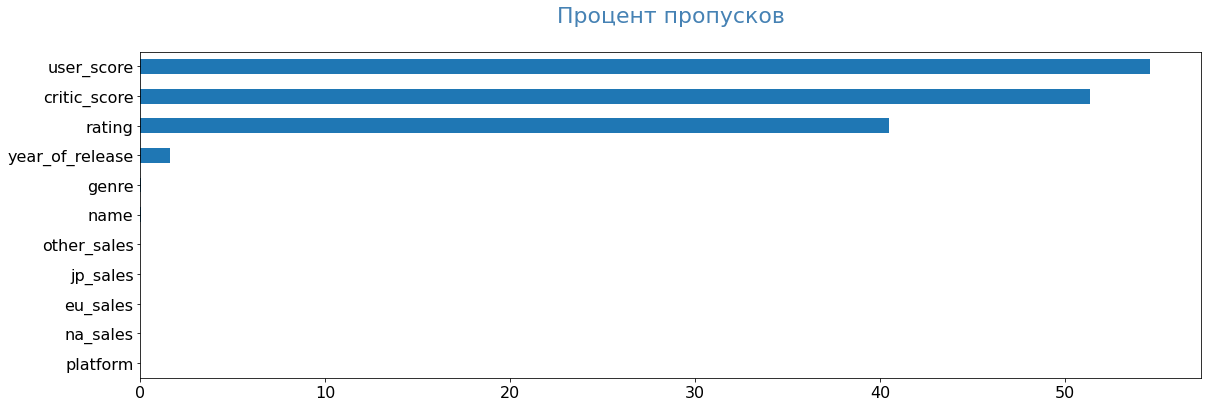

In [14]:
pass_value_barh(df)

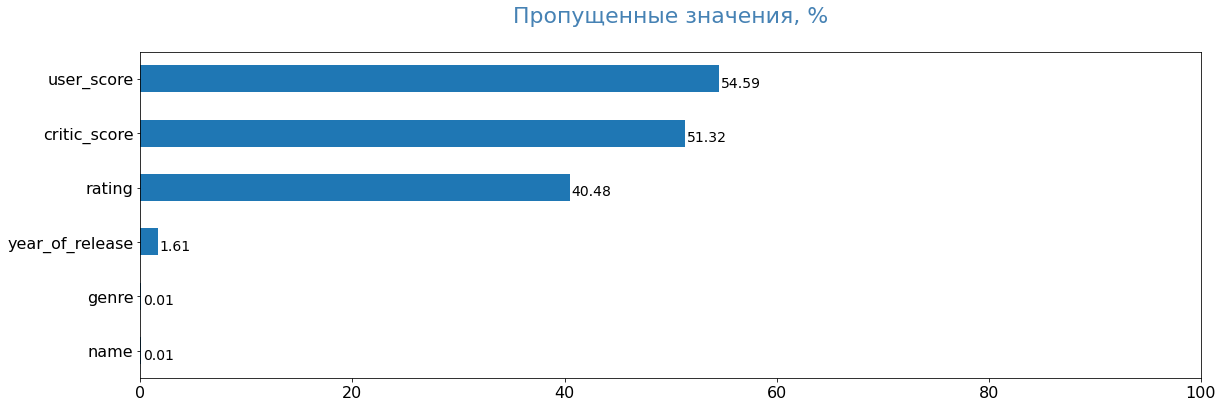

In [16]:
pass_value_barh(df)

Больше всего пропусков в 3х последних столбцах и совсем немного в year_of_release.

In [17]:
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

#### Аномальных значений, выходящих за 0 и 10 нет. Среднее меньше медианы, значит распределение скошено влево. Это подтверждает гистограмма.

Text(0.5, 1.0, 'Распределение по оценкам')

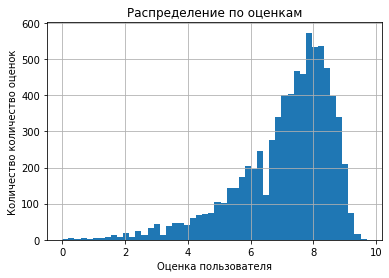

In [18]:
a = df['user_score'].hist(bins = 50)
a.set_xlabel('Оценка пользователя')
a.set_ylabel('Количество количество оценок')
plt.title("Распределение по оценкам")

In [19]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Ситуация аналогичная оценкам пользователей. Аномальных значений нет. Среднее меньше медианы, значит распределение скошено влево. Это подтверждает гистограмма.

Text(0.5, 1.0, 'Распределение по оценкам')

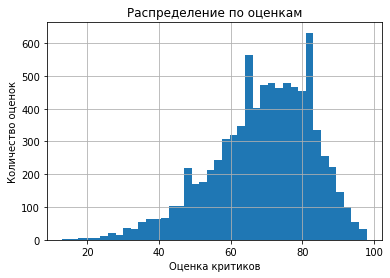

In [20]:
b = df['critic_score'].hist(bins = 40)
b.set_xlabel('Оценка критиков')
b.set_ylabel('Количество оценок')
plt.title("Распределение по оценкам")

In [21]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Это возрастной рейтинг. EC - («Early childhood») — «Для детей младшего возраста». «E» («Everyone») — «Для всех». «E10+» («Everyone 10 and older»). «T» («Teen») — «Подросткам». «M» («Mature») — «Для взрослых».«AO» («Adults Only 18+») — «Только для взрослых». «RP» («Rating Pending») — «Рейтинг ожидается». Изменим количество значений рейтинга. Рейтинг K-A можно заменить на Е10+. Также как и ЕС.В АО одна игра. Зато какая - GTA San Andreas. Изменим ее на M. А от RP избавимся. Год для них не определен. Продажи минимальные.

In [22]:
df.query('rating == "AO"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,grand theft auto: san andreas,xb,2005.0,action,1.26,0.61,0.0,0.09,93.0,8.6,AO


In [23]:
df.shape

(16715, 11)

In [24]:
df = df[df['rating']!='RP']

In [25]:
df.shape

(16712, 11)

In [26]:
df['rating'] = df['rating'].str.replace('AO', 'M',regex=True)


/tmp/ipykernel_193/2000360369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].str.replace('AO', 'M',regex=True)


In [27]:
df['rating'] = df['rating'].str.replace('K-A', 'Е10+',regex=True)

/tmp/ipykernel_193/156960321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].str.replace('K-A', 'Е10+',regex=True)


In [28]:
df['rating'] = df['rating'].str.replace('EC', 'Е10+',regex=True)

/tmp/ipykernel_193/453064177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].str.replace('EC', 'Е10+',regex=True)


In [29]:
df['rating'].value_counts()

E       3990
T       2961
M       1564
E10+    1420
Е10+      11
Name: rating, dtype: int64

In [30]:
df.pivot_table(index='year_of_release', values=['critic_score','user_score'], aggfunc={'count','mean'})

critic_score            user_score          
                       count       mean      count      mean
year_of_release                                             
1980.0                     0        NaN          0       NaN
1981.0                     0        NaN          0       NaN
1982.0                     0        NaN          0       NaN
1983.0                     0        NaN          0       NaN
1984.0                     0        NaN          0       NaN
1985.0                     1  59.000000          1  5.800000
1986.0                     0        NaN          0       NaN
1987.0                     0        NaN          0       NaN
1988.0                     1  64.000000          1  2.200000
1989.0                     0        NaN          0       NaN
1990.0                     0        NaN          0       NaN
1991.0                     0        NaN          0       NaN
1992.0                     1  85.000000          1  8.200000
1993.0                     0        NaN          0       NaN
1994.0                     1  69.000000          1  6.300000
1995.0                     0        NaN          0       NaN
1996.0                     8  89.875000          8  8.400000
1997.0                    17  85.294118         18  8.472222
1998.0                    28  81.821429         31  8.506452
1999.0                    39  75.769231         31  8.480645
2000.0                   143  69.349650        107  7.531776
2001.0                   326  71.414110        257  7.594942
2002.0                   627  69.046252        464  7.585129
2003.0                   585  70.181197        516  7.859884
2004.0                   561  69.393939        489  7.750511
2005.0                   655  68.819847        583  7.509605
2006.0                   620  67.338710        552  7.247283
2007.0                   692  66.180636        629  6.895707
2008.0                   715  65.904895        661  6.950983
2009.0                   651  67.554531        614  6.990717
2010.0                   500  67.482000        467  6.875375
2011.0                   499  68.703407        500  6.623200
2012.0                   321  72.984424        339  6.817404
2013.0                   273  71.278388        304  6.470724
2014.0                   261  71.065134        329  6.580243
2015.0                   225  72.871111        297  6.665993
2016.0                   232  73.155172        262  6.629771

<AxesSubplot:xlabel='year_of_release'>

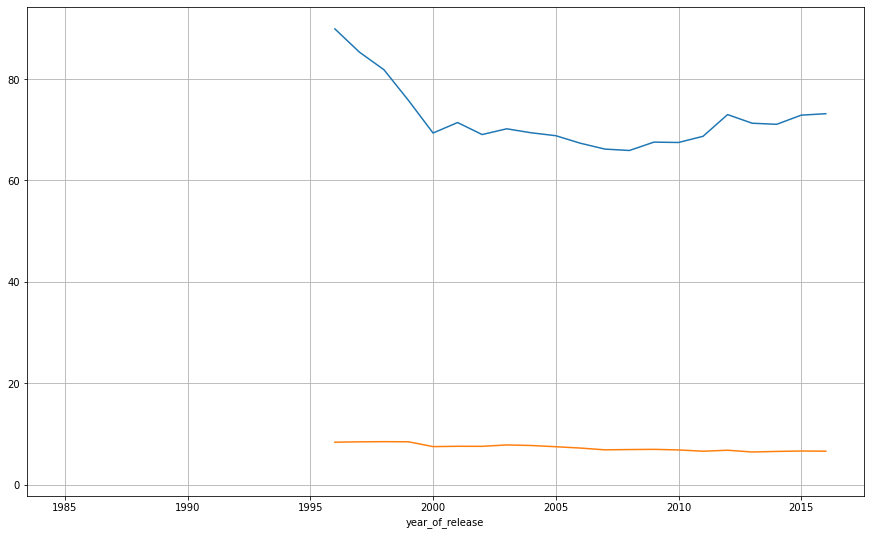

In [31]:
df.groupby('year_of_release')['critic_score'].mean().plot(grid=True, figsize=(15, 9))
df.groupby('year_of_release')['user_score'].mean().plot(grid=True, figsize=(15, 9))

Как видно игры начали оценивать только с середины 1990х. При этом  в рассматриваемой таблице представлены игры, которые начали выходить с 1980г.  Пропуски в данных связаны с тем, что долгое время для игр не существовало каких-либо общепринятых систем оценивания и рейтинга. Заполнять эти пропуски медианным или средним значением не имеет смысла. Найдем распределение пропусков по значениям в других столбцах.

In [32]:
df.groupby('platform')['critic_score'].apply(lambda x:x.isnull().sum()) \
                                      .reset_index(name='missing_count').sort_values('missing_count',ascending=False)

,platform,missing_count
4,ds,1434
15,ps,997
16,ps2,863
19,psp,747
25,wii,735
17,ps3,511
6,gba,384
2,3ds,352
28,x360,346
10,n64,319


In [33]:
df.groupby('platform')['user_score'].apply(lambda x:x.isnull() \
                                    .sum())\
                                    .reset_index(name='missing_count')\
                                    .sort_values('missing_count',ascending=False)

,platform,missing_count
4,ds,1635
15,ps,1035
16,ps2,920
19,psp,788
25,wii,760
6,gba,567
17,ps3,454
2,3ds,346
10,n64,319
28,x360,296


Видно, что пропусков много для одинаковых платформ, которые были популярны в середине 1990х- начале 2000х. В этом время индустрия обзоров еще не была сильно развита и не охватывала все выходящие игры.

### 1.7 Суммарные продажи

In [34]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

/tmp/ipykernel_193/143246461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


Проведено первичное исследование данных. Найдены и проанализированы пропуски в столбцах и дубликаты.  Удалены строки, в которых пропущены название игр и жанр - без этих данных строки не имеет смысл включать в анализ. Создан и заполнен столбец с общими продажами по каждой игре по всем регионам.

Наверное можно заполнить, основываясь на пропусках в жанрах. Например, принять что игры в жанрах fighting, shooter, action по умолчанию относятся к категории М (mature), а sports, racing, puzzle к категории E(everyone). Перебирать название игр будет слишком трудоемкой задачей. Но даже в этом случае мы не сможем точно знать какой контент содержится в игре. 

In [37]:
df_rating_nan = df.loc[df['rating'].isna()==True]

In [38]:
df_rating_nan['genre'].value_counts()

action          1181
misc             868
adventure        857
sports           839
role-playing     721
fighting         411
racing           377
strategy         344
platform         319
simulation       305
shooter          304
puzzle           238
Name: genre, dtype: int64

In [39]:
df['rating'].value_counts()

E       3990
T       2961
M       1564
E10+    1420
Е10+      11
Name: rating, dtype: int64

In [40]:
df[df['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [41]:
df[df['genre'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [42]:
df.shape

(16712, 12)

In [43]:
df=df[df['name'].isna()!=True]

In [44]:
df.shape

(16710, 12)

In [45]:
df = df[df.duplicated(subset=['name','platform','year_of_release']) == False]

In [46]:
df.shape

(16709, 12)

## 2. Исследовательский анализ данных

### 2.1 Определение количества игр по годам

Text(0.5, 1.0, 'Распределение по количеству выпускаемых игр')

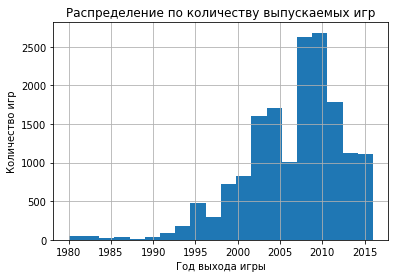

In [47]:
с = df['year_of_release'].hist(bins = 20)
с.set_xlabel('Год выхода игры')
с.set_ylabel('Количество игр')
plt.title("Распределение по количеству выпускаемых игр")

### 2.2 Зависимость продаж от платформы

<AxesSubplot:title={'center':'Зависимость продаж от платформы'}, ylabel='platform'>

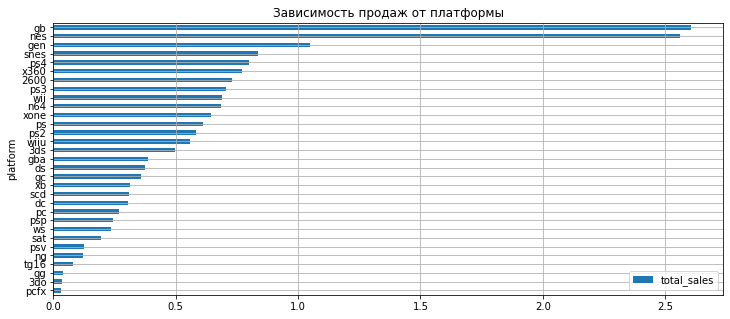

In [49]:
df.pivot_table(index='platform', values='total_sales').sort_values(by = 'total_sales', ascending = True)\
                                                      .plot(kind = 'barh', grid=True,
                                                       figsize=(12, 5), title = 'Зависимость продаж от платформы')

In [50]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Наибольшие продажи демонстрируют следующие платформы - GB, NES, GEN, SNES, PS4, X360. Построим по ним распрееделение по годам. Возьмем по суммарным продажам более 0,5 млн копий.

In [51]:
filter_list = ['gb', 'nes', 'gen', 'snes', 'ps4', 'x360','2600','ps3','wii','n64','xone','ps','ps2','wiiu']

In [52]:
top_platform = df[df.platform.isin(filter_list)]

In [53]:
top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16693,pga european tour,n64,2000.0,sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16694,carmageddon 64,n64,1999.0,action,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,score international baja 1000: the official game,ps2,2008.0,racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### 2.3 Зависимость продаж от релиза

<AxesSubplot:title={'center':'Зависимость продаж игр по платформам от года релиза'}, xlabel='year_of_release'>

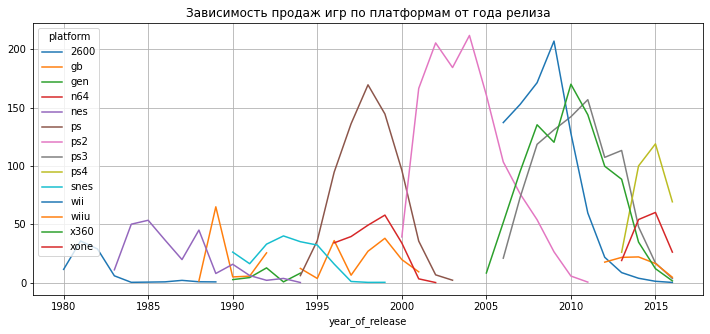

In [54]:
top_platform.pivot_table(columns ='platform', 
                         index='year_of_release',
                         values='total_sales',
                         aggfunc='sum').\
                         plot(grid=True, figsize=(12, 5), title = 'Зависимость продаж игр по платформам от года релиза')

Видно, что игры, запущенные на платформах в 1980х, до настоящего времени не "дожили". Посмотрим на развитие серии PS.

In [55]:
ps_list = [ 'ps4', 'ps3','ps2','ps']

In [56]:
ps_platform = df[df.platform.isin(ps_list)]

### 2.4 Зависимость продаж PS от релиза

<AxesSubplot:title={'center':'Зависимость продаж игр серии PS от года релиза'}, xlabel='year_of_release'>

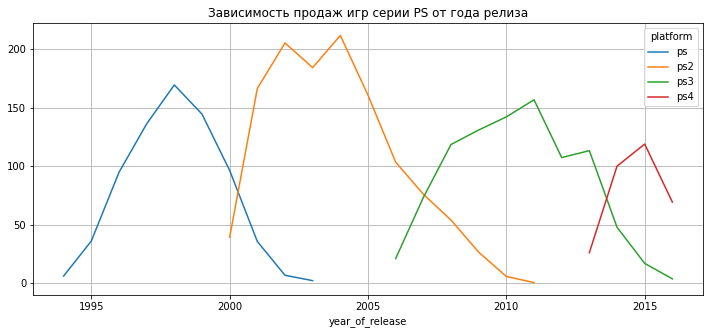

In [57]:
ps_platform.pivot_table(columns ='platform', 
                        index='year_of_release', 
                        values='total_sales',
                        aggfunc='sum')\
                        .plot(grid=True, figsize=(12, 5), title = 'Зависимость продаж игр серии PS от года релиза')

Новые платформы выходят и какое-то время работают параллельно со старыми, но к моменту выпуска новой платформы предпредыдущая уже не продается.  Приблизительно игровые платформы "живут" около 10 лет. Посмотрим как изменялись продажи в течение 3 лет до рассматриваемого периода. Т.е. с 2013 года.

In [58]:
df_actual = df[df['year_of_release']>=2013]

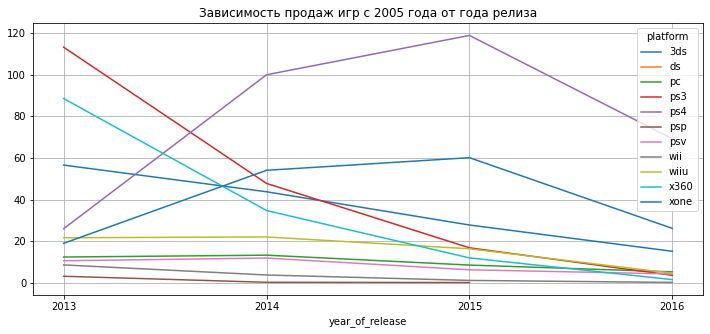

In [59]:
df_actual.pivot_table(columns ='platform', 
                      index='year_of_release', 
                      values='total_sales',
                      aggfunc = 'sum')\
                      .plot(grid=True, 
                            figsize=(12, 5), 
                            title = 'Зависимость продаж игр с 2013 года от года релиза')\
                            .xaxis.set_ticks(np.arange(2013, 2017, 1))

На первый взгляд общая тенденция на снижение продаж. 

Наибольшие продажи у PS4, XOne. Посмотрим в табличной форме.

In [60]:
df_actual.pivot_table(columns ='platform', 
                      index='year_of_release', 
                      values='total_sales',
                      aggfunc = 'sum')\
                      .sort_values(by = 'year_of_release', ascending = False)

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96


По числовым данным на 2016 лидеры следущие - PS4,XOne,3DS, WiiU, PS3, PC. Тренды почти у всех нисходящие.

Если брать данные за полный 2015 год по отношению к предыдущему периоду рост показали 2 платформы - PS4,XOne.

### 2.5 Boxplot по платформам

In [61]:
df_boxplot = df_actual.pivot_table(columns ='platform', 
                                   index='year_of_release', 
                                   values='total_sales',
                                   aggfunc = 'sum')

color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

# df_boxplot.plot.box(color=color, sym="r+", by = )

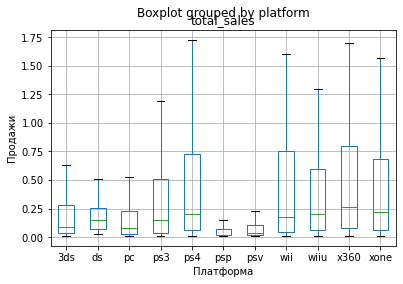

In [62]:
df_actual.boxplot(column="total_sales", by="platform", showfliers=False)
plt.xlabel("Платформа")
plt.ylabel("Продажи")
plt.show()

Также видно, что наибольшие продажи за рассматриваемый актуальный период у PS4, XOne, X360,  WiiU.При этом видно, что большие продажи были и у X360 и у Wi и у PS3,которые к 2016 году уже сдали свои позиции более современным своим модификациям.

### 2.6 Зависимость продаж от оценки

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Для примера возьмем X360, которая на рынке уже достаточно продолжительное время.

In [63]:
filter_x360 = df_actual.query('platform == "x360"')

In [64]:
filter_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
60,call of duty: ghosts,x360,2013.0,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
72,minecraft,x360,2013.0,misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
263,call of duty: advanced warfare,x360,2014.0,shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
271,fifa 14,x360,2013.0,sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,caladrius,x360,2013.0,shooter,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16450,turbo: super stunt squad,x360,2013.0,sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16460,young justice: legacy,x360,2013.0,action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16491,ride,x360,2015.0,racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

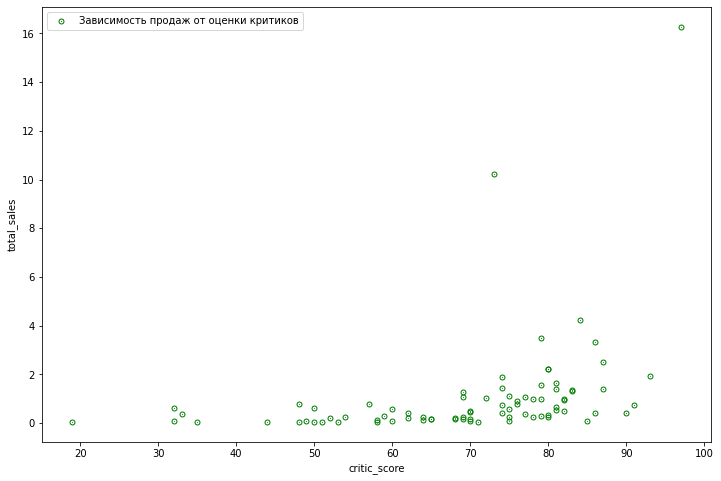

In [65]:
filter_x360.plot(kind='scatter', 
                 y='total_sales', 
                 x='critic_score', 
                 linewidth=5, alpha=1, 
                 label='Зависимость продаж от оценки критиков', 
                 c='g',
                 s=1,
                 figsize=(12, 8))


In [66]:
filter_x360['critic_score'].corr(filter_x360['total_sales']).round(decimals=2)

0.35

По коэффициенту корреляции видно, что корреляция между оценкой критиков и продажи слабая. Однако по диаграмме рассеяния можно отметить, что с увеличением оценки критиков, например, с величины 70 и выше корреляция возрастает. Проверим это.

In [67]:
filter_x360_high_ranking = df_actual.query('platform == "x360" & critic_score > 70')

In [68]:
filter_x360_high_ranking['critic_score'].corr(filter_x360_high_ranking['total_sales']).round(decimals=2)

0.35

 Корреляция не изменилась.

#### После изменения периода охвата до 2013 года корреляция стала дажа меньше чем была.

In [69]:
filter_x360.query('total_sales > 15')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


#### Зависимость практически отсутствует. Посмотрим другую  популярную платформу - PS4.

In [72]:
filter_ps4 = df_actual.query('platform == "ps4"')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

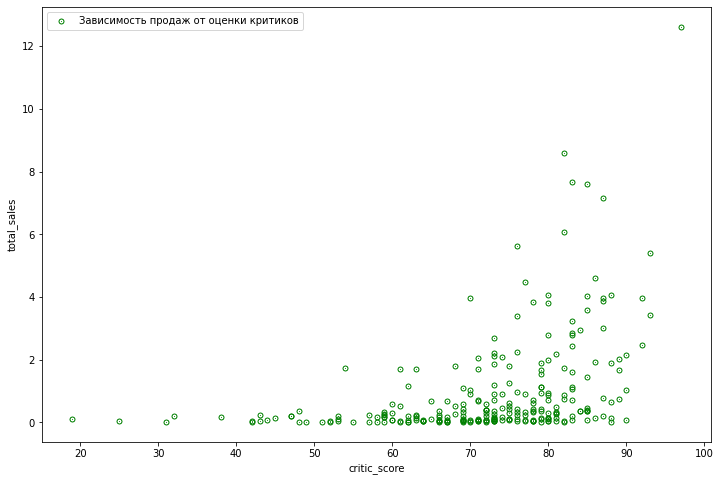

In [73]:
filter_ps4.plot(kind='scatter', 
                y='total_sales', 
                x='critic_score', 
                linewidth=5, 
                alpha=1, 
                label='Зависимость продаж от оценки критиков', 
                c='g', 
                s=1,
                figsize=(12, 8))

In [74]:
filter_ps4['critic_score'].corr(filter_ps4['total_sales']).round(decimals=2)

0.41

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

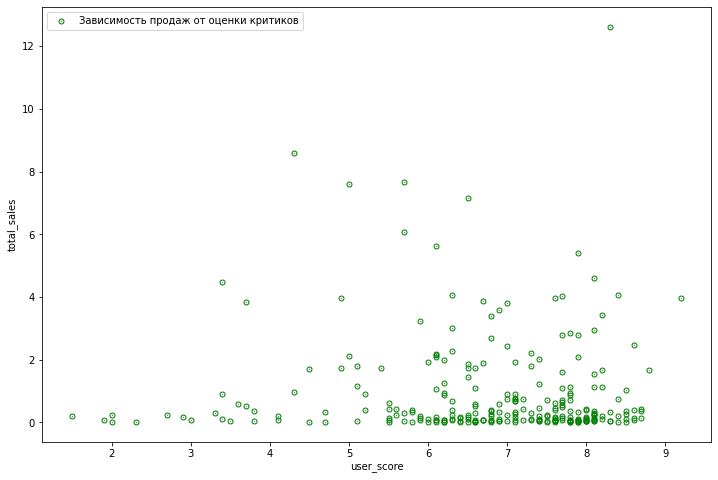

In [75]:
filter_ps4.plot(kind='scatter', 
                y='total_sales', 
                x='user_score', 
                linewidth=5, 
                alpha=1, 
                label='Зависимость продаж от оценки критиков', 
                c='g', 
                s=1,
                figsize=(12, 8))

In [76]:
filter_ps4['user_score'].corr(filter_ps4['total_sales']).round(decimals=2)

-0.03

#### Ситуация аналогичная. Посмотрим еще WiiU

In [77]:
filter_wii = df_actual.query('platform == "wiiu"')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

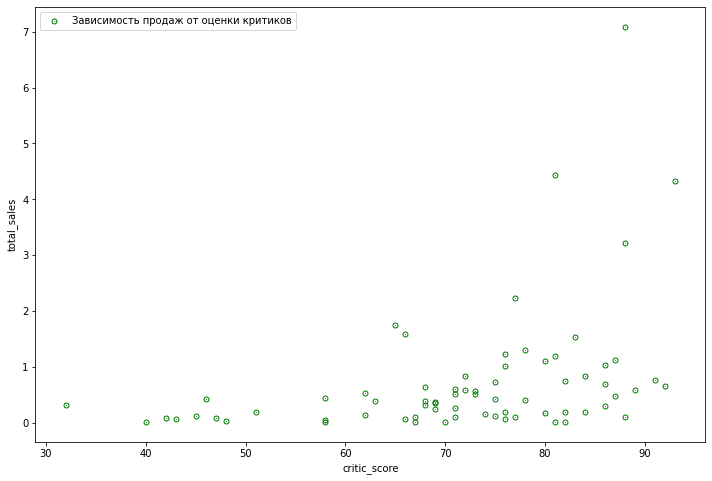

In [78]:
filter_wii.plot(kind='scatter', 
                y='total_sales', 
                x='critic_score', 
                linewidth=5, 
                alpha=1, 
                label='Зависимость продаж от оценки критиков', 
                c='g', 
                s=1,
                figsize=(12, 8))

In [79]:
filter_wii['critic_score'].corr(filter_wii['total_sales']).round(decimals=2)

0.38

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

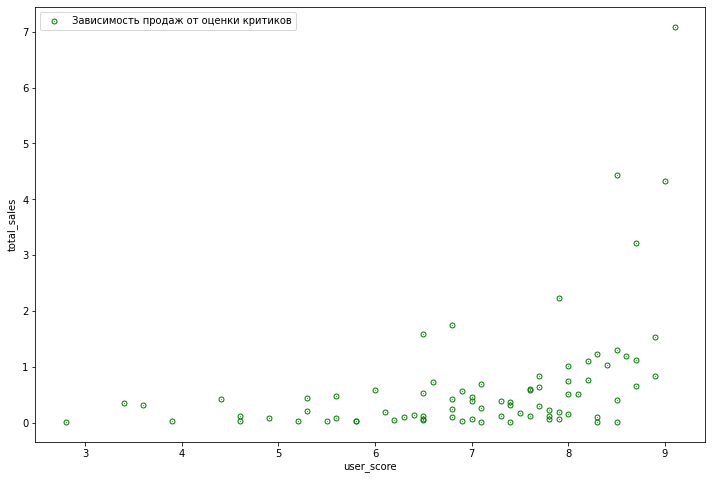

In [80]:
filter_wii.plot(kind='scatter', 
                y='total_sales', 
                x='user_score', 
                linewidth=5, 
                alpha=1, 
                label='Зависимость продаж от оценки критиков', 
                c='g',
                s=1,
                figsize=(12, 8))

In [81]:
filter_wii['user_score'].corr(filter_wii['total_sales']).round(decimals=2)

0.42

В общем картина аналогичная. Существует небольшая корреляция между оценками экспертов и продажами игр. Часть пользователей перед тем как купить копию изучает мнение профессионалов в игровой индустрии. Оценка пользователей на продажи практически не влияет.

### 2.7 Распределение по жанрам

In [82]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [83]:
df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False)

genre
action          321.87
shooter         232.98
sports          150.65
role-playing    145.89
misc             62.82
platform         42.63
racing           39.89
fighting         35.31
adventure        23.64
simulation       21.76
strategy         10.08
puzzle            3.17
Name: total_sales, dtype: float64

Самые прибыльные жанры - экшн, спортивные симуляторы и шутеры. Напротив самые низкие продажи показали стратегии, симуляторы и пазлы.

#### График с выбросами:

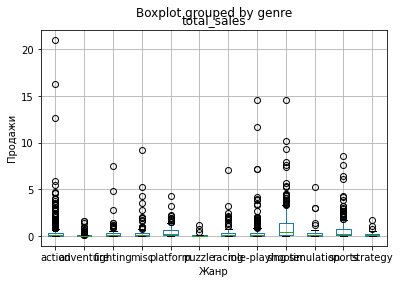

In [84]:
df_actual.boxplot(column="total_sales", by="genre", showfliers=True)
plt.xlabel("Жанр")
plt.ylabel("Продажи")
plt.show()

#### График без выбросов:

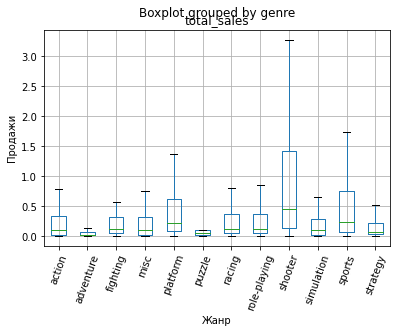

In [85]:
df_actual.boxplot(column="total_sales", by="genre", showfliers=False, rot=70)
plt.xlabel("Жанр")
plt.ylabel("Продажи")
plt.show()

## 3. Портрет пользователя каждого региона - Северной Америке (NA), Европы (EU) и Японии (JP)

### 3.1 Самые популярные платформы для каждого региона

In [1]:
df_actual.pivot_table(columns ='platform', 
                      values=['na_sales','eu_sales','jp_sales'], 
                      aggfunc = 'sum')\
                      .transpose() 

NameError: name 'df_actual' is not defined

In [88]:
top_platform = df_actual.pivot_table(columns ='platform', 
                      values=['na_sales','eu_sales','jp_sales'], 
                                     aggfunc = 'sum').transpose()
top_platform['na_sales'].sort_values(ascending = False)

platform
ps4     108.74
xone     93.12
x360     81.66
ps3      63.50
3ds      38.20
wiiu     29.21
pc       11.11
wii       6.56
psv       5.04
ds        0.57
psp       0.00
Name: na_sales, dtype: float64

In [89]:
top_platform['eu_sales'].sort_values(ascending = False)

platform
ps4     141.09
ps3      67.81
xone     51.59
x360     42.52
3ds      30.96
pc       25.36
wiiu     19.85
psv       6.10
wii       5.93
ds        0.85
psp       0.17
Name: eu_sales, dtype: float64

In [90]:
top_platform['jp_sales'].sort_values(ascending = False)

platform
3ds     67.81
ps3     23.35
psv     18.59
ps4     15.96
wiiu    10.88
psp      3.29
x360     0.51
xone     0.34
wii      0.05
ds       0.00
pc       0.00
Name: jp_sales, dtype: float64

Самые популярные платформы в Европе - 1) PS3 2) X360 3) Wii 4) DS 5) PS4. В Северной Америке - 1) X360 2)Wii 3) PS3 4) DS 5) PS2. В Японии - 1) DS 2) 3DS 3)PS3 4)PSP 5)Wii. 


### 3.2 Определим самые популярные жанры для каждого региона

In [91]:
df_actual.pivot_table(columns ='genre', \
                      values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').transpose()

,eu_sales,jp_sales,na_sales
genre,,,
action,118.13,40.49,126.05
adventure,8.25,5.82,7.14
fighting,8.55,7.65,15.55
misc,20.04,9.20,27.49
platform,15.58,4.79,18.14
puzzle,1.00,1.18,0.83
racing,20.19,2.30,12.96
role-playing,36.97,51.04,46.40
shooter,87.86,6.61,109.74


In [92]:
top_genres = df_actual.pivot_table(columns ='genre', \
                      values=['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').transpose()

In [93]:
top_genres

,eu_sales,jp_sales,na_sales
genre,,,
action,118.13,40.49,126.05
adventure,8.25,5.82,7.14
fighting,8.55,7.65,15.55
misc,20.04,9.20,27.49
platform,15.58,4.79,18.14
puzzle,1.00,1.18,0.83
racing,20.19,2.30,12.96
role-playing,36.97,51.04,46.40
shooter,87.86,6.61,109.74


In [94]:
# top5_eu_others

In [95]:
top_genres['jp_sales'].sort_values(ascending = False)

genre
role-playing    51.04
action          40.49
misc             9.20
fighting         7.65
shooter          6.61
adventure        5.82
sports           5.41
platform         4.79
simulation       4.52
racing           2.30
strategy         1.77
puzzle           1.18
Name: jp_sales, dtype: float64

In [96]:
top_genres['na_sales'].sort_values(ascending = False)

genre
action          126.05
shooter         109.74
sports           65.27
role-playing     46.40
misc             27.49
platform         18.14
fighting         15.55
racing           12.96
adventure         7.14
simulation        4.86
strategy          3.28
puzzle            0.83
Name: na_sales, dtype: float64

In [97]:
top_genres

,eu_sales,jp_sales,na_sales
genre,,,
action,118.13,40.49,126.05
adventure,8.25,5.82,7.14
fighting,8.55,7.65,15.55
misc,20.04,9.20,27.49
platform,15.58,4.79,18.14
puzzle,1.00,1.18,0.83
racing,20.19,2.30,12.96
role-playing,36.97,51.04,46.40
shooter,87.86,6.61,109.74


In [98]:
top_eu = top_genres['eu_sales'].sort_values(ascending=False) # сортируем по убыванию продаж в Европе
top5_eu = top_eu.head().to_frame().rename(columns = {0:'space'}) # делаем дата-фрейм топ-5
sum_other_eu = top_eu.iloc[5:].sum() # находим сумму оставшихся
other_eu = pd.DataFrame({'eu_sales': [sum_other_eu]}, index=['others']) # делаем дата-фрем для всех остальных
top6_eu = pd.concat([top5_eu, other_eu]) # соединяем 2 дата-фрейма
top6_eu #

,eu_sales
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19
others,68.56


In [99]:
top_jp = top_genres['jp_sales'].sort_values(ascending=False) # сортируем по убыванию продаж в Японии
top5_jp = top_jp.head().to_frame().rename(columns = {0:'space'}) # делаем дата-фрейм топ-5
sum_other_jp = top_jp.iloc[5:].sum() # находим сумму оставшихся
other_jp = pd.DataFrame({'jp_sales': [sum_other_jp]}, index=['others']) # делаем дата-фрем для всех остальных
top6_jp = pd.concat([top5_jp, other_jp]) # соединяем 2 дата-фрейма
top6_jp #

,jp_sales
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61
others,25.79


In [100]:
top_na = top_genres['na_sales'].sort_values(ascending=False) # сортируем по убыванию продаж в Северной Америке
top5_na = top_na.head().to_frame().rename(columns = {0:'space'}) # делаем дата-фрейм топ-5
sum_other_na = top_na.iloc[5:].sum() # находим сумму оставшихся
other_na = pd.DataFrame({'na_sales': [sum_other_na]}, index=['others']) # делаем дата-фрем для всех остальных
top6_na = pd.concat([top5_na, other_na]) # соединяем 2 дата-фрейма
top6_na #

,na_sales
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49
others,62.76


В Европе и Северной Америке топ жанров практически одинаковый. В Японии на первом месте RPG. Возможно это связано с тем, что большинство игр этого жанра в Японии распространяется на их родных платформах Nintendo DS и 3DS. 

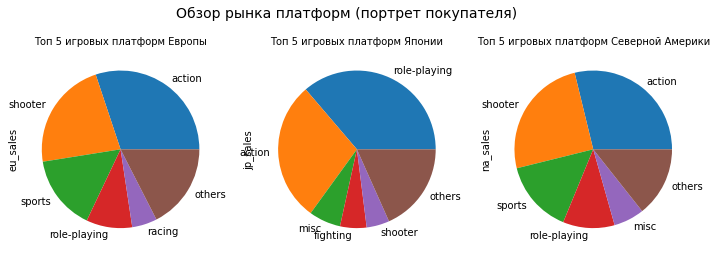

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(12,8))

top6_eu.plot.pie(subplots=True, legend=False, figsize=(6, 6), ax=ax[0])
ax[0].set_title('Топ 5 игровых платформ Европы', fontsize=10)

top6_jp.plot.pie(subplots=True, legend=False, figsize=(6, 6), ax=ax[1])
ax[1].set_title('Топ 5 игровых платформ Японии', fontsize=10)

top6_na.plot.pie(subplots=True,legend=False, figsize=(6, 6), ax=ax[2])
ax[2].set_title('Топ 5 игровых платформ Северной Америки', fontsize=10)

fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=14, y=0.75)

plt.show()

### 3.3 Влияние рейтинга ESRB на продажи в отдельном регионе

In [102]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013.0,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014.0,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [103]:
df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

In [104]:
df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

rating
M       145.32
E        83.36
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

In [105]:
df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

rating
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

Как видно продажи игр с определенным возрастным рейтингом практически идентичны для всех регионов. В Японии больше продаются игры с рейтингом Т - для подростков и меньше с рейтингом M - для взрослых. Возможно это связано с тем, что в Японии больше геймеров подросткового возраста или еще младше.

## 4. Проверка гипотез

### 4.1 Проверка гипотезы №1

H_0: Средние пользовательские рейтинги(user_score) для платформы Xbox One = Средние пользовательские рейтинги(user_score) для платформы PC
H_a: Средние пользовательские рейтинги(user_score) для платформы Xbox One ≠ Средние пользовательские рейтинги(user_score) для платформы PC`
alpha = 0.05


Подготовим дата-сет для проверки гипотез - избавимся от строк с пропусками.

In [106]:
df_actual_test = df_actual.dropna(subset=['user_score'])

In [107]:
df_actual_test

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,call of duty: ghosts,x360,2013.0,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,call of duty: ghosts,ps3,2013.0,shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,rugby challenge 3,xone,2016.0,sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16652,fast racing neo,wiiu,2016.0,action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,ben 10 omniverse 2,x360,2013.0,action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16660,prison architect,xone,2016.0,action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


In [108]:
results = st.ttest_ind(df_actual_test.loc[df_actual_test['platform']=='xone','user_score'], 
                       df_actual_test.loc[df_actual_test['platform']=='pc','user_score'], 
                       equal_var = True) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Найденное значение p-value больше коэффициента значимости. Полученное значение p-value говорит о том, что хотя средний рейтинг  неодинаков, с вероятностью в почти 14% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.

### 4.2 Проверка гипотезы №2

H_0: Средние пользовательские рейтинги(user_score) для жанра Action = Средние пользовательские рейтинги(user_score) для жанра Sports

H_a: Средние пользовательские рейтинги(user_score) для жанра Action ≠ Средние пользовательские рейтинги(user_score) для жанра Sports
alpha = 0.05

In [110]:
results = st.ttest_ind(df_actual_test.loc[df_actual_test['genre']=='sports','user_score'], 
                       df_actual_test.loc[df_actual_test['genre']=='action','user_score'], 
                       equal_var = False)# results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = задайте значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


## 5. Вывод

#### В исследовательском проекте был проведен  анализ на предмет влияния различных факторов (платформа, год выпуска, количество продаж по регионам) на успешность той или иной игры. Проверены гипотезы о равенстве  и различие рейтингов пользователей для разных платформ и жанров.

#### Было определено, что в полном смысле слова массовыми игры стали с середины 1990х, когда стоимость персональных компьютеров снизилась и начали появляться различные альтернативные аппаратные средства для игр - консоли, приставки итд. Примерно в это же время начала формироваться сфера оценки игр - появилось профессиональное сообщество, которое начало оценивать выпускаемы игры и делиться своим мнением.

#### Было определено, что в среднем новая запускаемая платформа для игр "живет" порядка 10 лет. Потом она либо пропадает навсегда либо эволюционирует и начанается выпуск более современных моделей.

#### По числовым данным на 2016 лидеры продаж по платформам - PS4,XOne,3DS, WiiU, X360. При этом тренды почти у всех нисходящие.

#### Был оценен актуальный период, за который можно проводить анализ для планирования действий на рынке. С 2013 по 2016. Было определено, что наибольшие продажи за рассматриваемый актуальный период у PS4 и XOne. При этом видно, что большие продажи были у Wi и у PS3 и у Х360,которые к 2016 году уже сдали свои позиции более современным своим модификациям, но в середине нулевых были топами.

#### Была изучена зависимость продаж игр от результатов оценок экспертов и пользователей. Было обнаружено, что существует слабая корреляция между оценками экспертов и продажами игр. Часть пользователей перед тем как купить копию изучает мнение профессионалов в игровой индустрии. Оценка пользователей на продажи практически не влияет.

#### Самые прибыльные жанры - экшн, спортивные симуляторы и шутеры. Напротив самые низкие продажи показали стратегии, симуляторы и пазлы.

#### Были изучены зависимость продаж в различных регионах - Северной Америке, Европе и Японии. Самые популярные платформы в Европе - 1) PS3 2) X360 3) Wii 4) DS 5) PS4. В Северной Америке - 1) X360 2)Wii 3) PS3 4) DS 5) PS2. В Японии - 1) DS 2) 3DS 3)PS3 4)PSP 5)Wii. 

#### В Европе и Северной Америке топ жанров практически одинаковый: Action, Sport, Shooter. В Японии на первом месте RPG. Возможно это связано с тем, что большинство игр этого жанра в Японии распространяется на их родных платформах Nintendo DS и 3DS. 

#### Продажи игр с определенным возрастным рейтингом практически идентичны для всех регионов:1 - E(для всех) 2 - М(для взрослых) 3-Т(для подростков) 4-E10+(дети старше 10 лет).  В Японии больше продаются игры с рейтингом Т - для подростков и меньше с рейтингом M - для взрослых. Возможно это связано с тем, что в Японии больше геймеров подросткового возраста или еще младше.

#### Были проверены гипотезы - 1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 2) Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. 1 гипотеза была подтверждена, 2 гипотеза отвергнута. За нулевую гипотезу принималась гипотеза, когда рейтинги равны, за коэффциент значимости более жесткие 5% вместо 1%. При этом и для 1%  p-value не достигает указанное значения.


